### Hierarchical Clustering

1.  The main aim of this project is to build the clusters from the Mall_Customers datasets using Hierarchical Clustering technique.

2.  The Mall Customer dataset has the Customer's Age, gender, annual income and the spending score.


## Steps used by this algorithm:-

1. Import all the necessary libraries

2. Load the dataset

3. Explore EDA and do the data processing

4. Select the features for clustering

5. Scale the features

6. Create a Dendogram

7. Determine the total number of clusters

8. Apply Hierarchical Clustering

9. Visualize the clusters

10. Analyze the clusters

### Step 1: Import all the necessary libraries

In [1098]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing   import StandardScaler
from   sklearn.tree            import DecisionTreeClassifier
from   scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### Step 2:  Load the dataset

In [1099]:
df = pd.read_csv('Mall_Customers.csv')

In [1100]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### OBSERVATIONS:

1. The above dataset contains the details of the customer who has visited the mall.

    (a.)  CustomerID ---------------->    ID of the Customer.

    (b.)  Genre      ---------------->    Gender of the Customer.

    (c.)  Age        ---------------->    Age of the Customer.

    (d.)  Annual Income (k$) --------->   Annual Income of the Customer.

    (e.)  Spending Score (1-100) ------>  Spending Score of the Customer.


2. The above dataset does not have any output. So it can be used in unsupervised learning to form the clusters.

### Step 3: Explore EDA and do the data processing

In [1101]:
### depict the top five records of the dataset

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [1102]:
### depict the bottom five records of the dataset

df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [1103]:
### depict the length of the dataset

print("Length of the dataset is:", len(df))

Length of the dataset is: 200


In [1104]:
### shape of the dataset

df.shape

(200, 5)

In [1105]:
### get the original columns from the dataset

df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [1106]:
### Rename the columns to proper names

df.rename(columns={'Genre':'Gender',
                   'Annual Income (k$)':'Annual_Income',
                   'Spending Score (1-100)':'Spending_Score'
                   },inplace=True)

In [1107]:
### get the refined columns from the dataset

df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [1108]:
### get all the refined columns from the dataset

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

### OBSERVATIONS:

1. All the columns has been corrected.

In [1109]:
### get the information about the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [1110]:
### get the statistical summary about the dataset

df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### OBSERVATIONS:

1. The above data describes about the statistical summary for the above dataset.

In [1111]:
### Check for any NULL Values in the dataset

df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL values in the dataset.

In [1112]:
### Check for any duplicate records in the dataset

df[df.duplicated()]

,CustomerID,Gender,Age,Annual_Income,Spending_Score


### OBSERVATIONS:

1.  There are no duplicate records in the dataset.

### Step 4:  Select the features for clustering

In [1113]:
X=df[['Annual_Income','Spending_Score']]

In [1114]:
X

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### OBSERVATIONS:

1. The features selected for Hierarchical Clustering is:

    (a.)  Annual_Income

    (b.)  Spending_Score

### Step 5: Scale the features

In [1115]:
### Scale the inputs in one range to make it easier for training

from sklearn.preprocessing import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()


### scale the inputs

X_scaled = sc.fit_transform(X)

In [1116]:
print(X_scaled)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

### OBSERVATIONS:

1. After performing the feature scaling on the inputs , all the inputs has been scaled in one range.

### Step 6:  Create a Dendogram

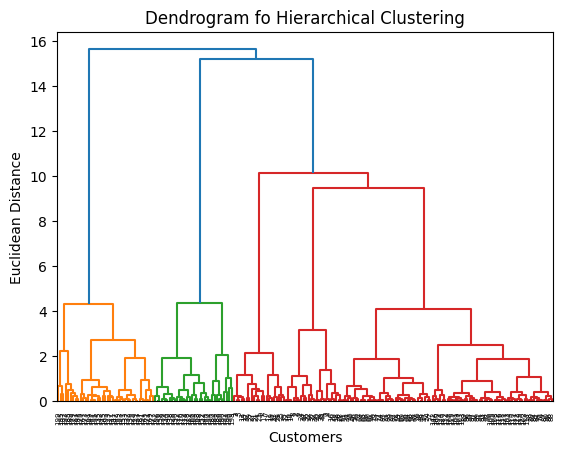

In [1117]:
'''
 We have the scaled inputs

   1. First create the linkage.

   2. From the linkage, then create the dendrogram
'''
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

### create the linkage

link_data = linkage(X_scaled, method = 'ward')

### From the linkage , create the dendrogram

dendrogram(link_data)

plt.title('Dendrogram fo Hierarchical Clustering')

plt.xlabel('Customers')

plt.ylabel('Euclidean Distance')

plt.show()


### OBSERVATIONS:

1. A dendrogram for Hierarchical clustering is created that has Customers in x axis and Euclidean Distance in y axis.

2. The dendrogram is created that is used to identify the total number of clusters in a given dataset

3. method = 'ward' is used to minimize the variance between the data points.

### Step 7: Determine the total number of clusters


1.  The total number of clusters is determined by the longest vertical line such that none of the horizontal line passes through it.

2. In the above hierarchical clustering dataset, the total number of clusters is 5. This is because 5 si the point where none of the hierarchical line passes through it.

3. k = 5

### Step 8:  Apply Hierarchical Clustering

In [1118]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


### from the linkage data form the cluster labels

clusters = fcluster(link_data,5,criterion='maxclust')

In [1119]:
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 2, 1, 2, 1,
       5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

### OBSERVATIONS:

1. We have a dendrogram linkage matrix for Hierarchical Clustering.

2. fcluster is used to convert the linkage matrix into the actual labels.

3. this fcluster takes the inputs as:-
  
    (a.) linkage_matrix ------------> link_data (linkage data)

    (b.) maximum number of clusters ---> 5

    (c.) criterion = 'maxclust' --------> How the clusters need to be formed.
 

In [1120]:
df['cluster_label'] = clusters

In [1121]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster_label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


### OBSERVATIONS:

1.  Here a cluster label has been added to the dataset that explains about the  label defined for each and every customer.

### Step 9:  Visualize the clusters

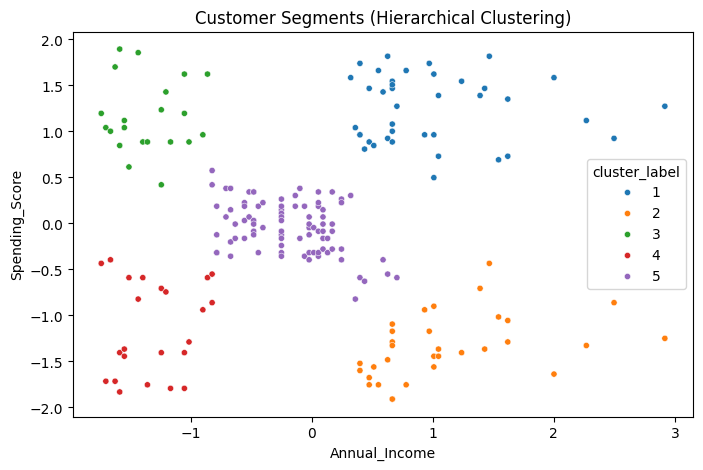

In [1122]:
plt.figure(figsize=(8,5))

### Visulaize the clusters
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue = df['cluster_label'],s=20,palette='tab10')

plt.title('Customer Segments (Hierarchical Clustering)')

plt.xlabel('Annual_Income')

plt.ylabel('Spending_Score')

plt.show()

### OBSERVATIONS:

1. The Mall_Customers dataset is divided into 5 clusters using the concept of Hierarchical Clsutering.

2. Each cluster has been assigned with a label.

    (a.)  cluster_label 1

    (b.)  cluster_label 2

    (c.)  cluster_label 3

    (d.)  cluster_label 4

    (e.)  cluster_label 5

### Step 10: Analyze the clusters

In [1123]:
means_summary = df.groupby('cluster_label')[['Annual_Income','Spending_Score']].mean()

In [1124]:
means_summary

,Annual_Income,Spending_Score
cluster_label,,
1,86.538462,82.128205
2,89.406250,15.593750
3,25.095238,80.047619
4,26.304348,20.913043
5,55.811765,49.129412


### OBSERVATIONS:

1. The above statistics data shows about the mean value of 'Annual_Income' and 'Spending_Score' for each cluster label.